# Daten einlesen und analysieren mit Pandas
In diesem Notebook geht es um das Einlesen und Analysieren von Daten mit der Python-Bibliothek [*Pandas*](https://pandas.pydata.org/docs/index.html).

## Installation

- Terminal: `pip install pandas` oder `conda install pandas`.
- Jupyter notebook: `!pip install pandas` oder `!conda install pandas`. 


In [ ]:
!pip install pandas

## Import Statement
Wie bei anderen Python-Bibliotheken auch, müssen wir *Pandas* vor der Nutzung erst importieren. Es ist Konvention dabei *Pandas* als `pd` abzukürzen. 

In [ ]:
import pandas as pd


## DataFrames
Die [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) ist ein zweidimensionaler Datentyp in *Pandas* und dient zur Verarbeitung von tabellarischen Daten. Es ist Konvention Variablen die DataFarames referenzieren als `df` zu bezeichnen. 
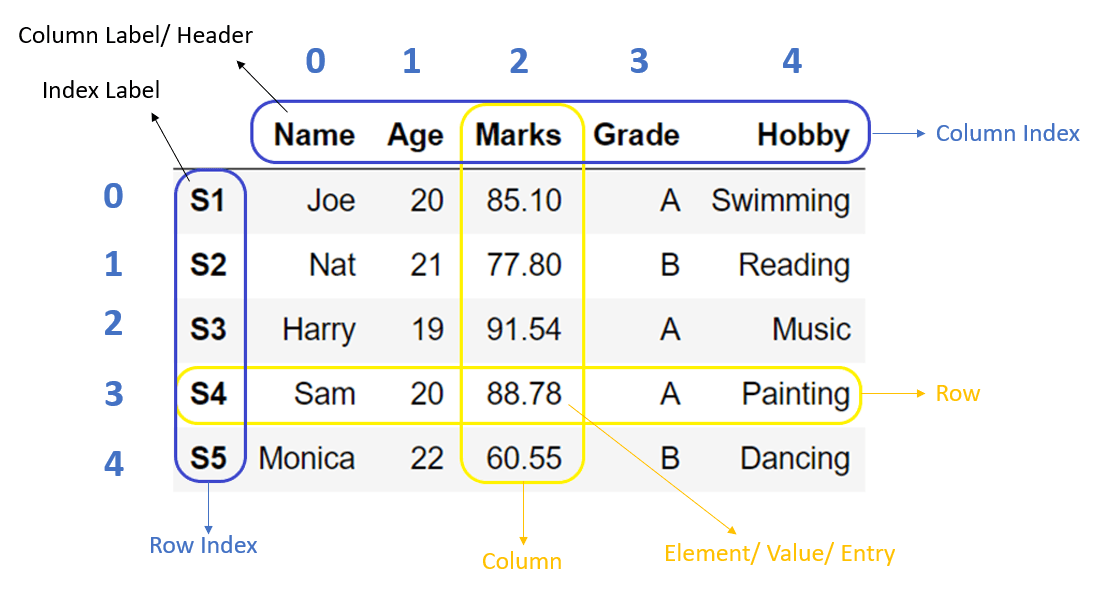
Quelle: https://pynative.com/python-pandas-dataframe/

### Wie erstellt man DataFrames? 
#### Manuelle Erstellung
Hier gibt es verschiedene Möglichkeiten, allerdings ist kann ein Python-Dictionary direkt die Spaltennamen und Werte festgelegt werden. Jeder Schlüssel entspricht hierbei dem Spaltennamen und die jeweiligen Werte den Listen der Schlüssel. 

In [ ]:
# manuelle Erstellung aus einem Dictionary

adict = {'col1': [1, 2, 3], 'col2': [2, 4, 6], 'col3': [3, 4, 5]}

df = pd.DataFrame(adict)

# DataFrame zeigen
df

#### Einlesen einer Excel-Datei
In der Praxis werden DataFrames meist durch das einlesen von Daten aus externen Formaten erzeugt, wie bspw. Excel oder CSV-Dateien.

In [ ]:
# Exceldatei einlesen und auswerten
df = pd.read_excel('censuspopdata.xlsx')
df


### Einlesen einer CSV Datei
In diesem Beispiel verwenden wir den [Books Datensatz](https://www.kaggle.com/datasets/jalota/books-dataset).
<div class="alert alert-info">
<b>Achtung</b> Beim einlesen von CSV Dateien, ist es wichtig auf den Parameter <i>sep</i> zu achten. Dieser gibt vor, was als Trennungszeichen verwendet wird. 
</div>

In [ ]:
# CSV Datei einlesen und auswerten
df = pd.read_csv('books.csv')
df

## Einlesen von HTML

## Datenbereinigung
### Datentypen korrigieren
Oft sind beim Einlesen von Daten nicht alle Datentypen direkt entsprechend gesetzt in der DataFrame. Daher, muss dies manuell gemacht werden mit der Funktion [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html). 

In [ ]:
# welche Datentypen sind in der DataFrame?

df.info()

In [ ]:
# Datentyp float64 setzen für Stars
df['Stars'] = df['Stars'].astype('float64')



### Fehlende Werte ersetzen
Fehlende Werte werden in *Pandas* mit `nan` bezeichnet. Daher sollten Werte die in den Rohdaten für fehlende Werte stehen (bspw. "unbekannt", "-", "n.a.") damit ersetzt werden.

In [ ]:
import numpy as np 

# Kategorie "Add a comment" mit np.nan ersetzen 
df['Category'].replace('Add a comment', np.nan, inplace=True)

In [ ]:
df['Tax_amount'].isna()

In [ ]:
df['Tax_amount'].fillna(0, inplace=True)

## Inplace in Pandas 
Der Parameter `inplace` bei *Pandas* Funktionen die aufgerufen werden für die Manipulation einer DataFrame gibt an, ob die DataFrame geändert werden soll oder lediglich eine geänderte Version der DataFrame angezeigt werden soll.

In [ ]:
df

In [ ]:
# hier löschen wir Spalte "Unnamed: 0", allerdings geben wir hier die df nur aus

df.drop('Unnamed: 0', axis=1).head()

In [ ]:
# die Spalte ist noch da
df.head()

In [ ]:
# löschen mit inplace
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

## Nützliche Funktionen der DataFrame


In [ ]:
# Oberste Spalten zeigen
df.head()

In [ ]:
# unterste Spalten
df.tail()

In [ ]:
# Datentypen der Spalten der DataFrame
df.info()

In [ ]:
# Descriptive Statistiken der DataFrame
df.describe()

### Descriptive Statistiken pro Spalte

In [ ]:
# Durchschnittspreis
df['Price'].mean()

In [ ]:
# Standardabweichung des Preises
df.Avilability.std()

## Selektion von Daten aus DataFrames
### Spalten extrahieren
Wenn nur eine Spalte extrahiert wird, entspricht der Datentyp einer [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html?highlight=series#pandas.Series). Diese hat teilweise andere Funktionen und nicht alle Funktionen, welche die DataFrame hat.

In [ ]:
df['Price']

### Einzelne Zellen extrahieren
Eine Möglichkeit ist, dies mit dem Index der Dimension zu tun, bspw: "Gib mir die Daten der zweiten Spalte und der dritten Zeile". Dies funktioniert mit der Funktion `iloc`.
<div class="alert alert-info">
<b>Achtung!</b> Wie in Python üblich, started die Indizierung bei 0. Das heißt: die erste Zeile und Spalte wird jeweils mit 0 extrahiert und nicht mit 1. 1 extrahiert die zweite Spalte usw.
</div>

In [ ]:
# Zeilen mit Index 4 bis Index 9 und nur die Spalten Tax_amount und Avilability
df.iloc[4:10, 4:6]

Es können auch gezielt Daten aus Zellen extrahiert werden mit Angabe der Index- und Spaltennamen.

In [ ]:
# zeige mir Zeilen mit Index 10-20 und Spalten Title und Category
df.loc[10:20,['Title', 'Category']]

## Zuweisung von neuen Spalten, Zeilen und Werten
### Neue Werte in Zelle

In [ ]:
df.iloc[0,0] = 'First Cell'
df.head(1)

## Gruppierungen
Die Gruppierungen in *Pandas* sind vergleichbar mit dem `GROUP BY` in SQL.
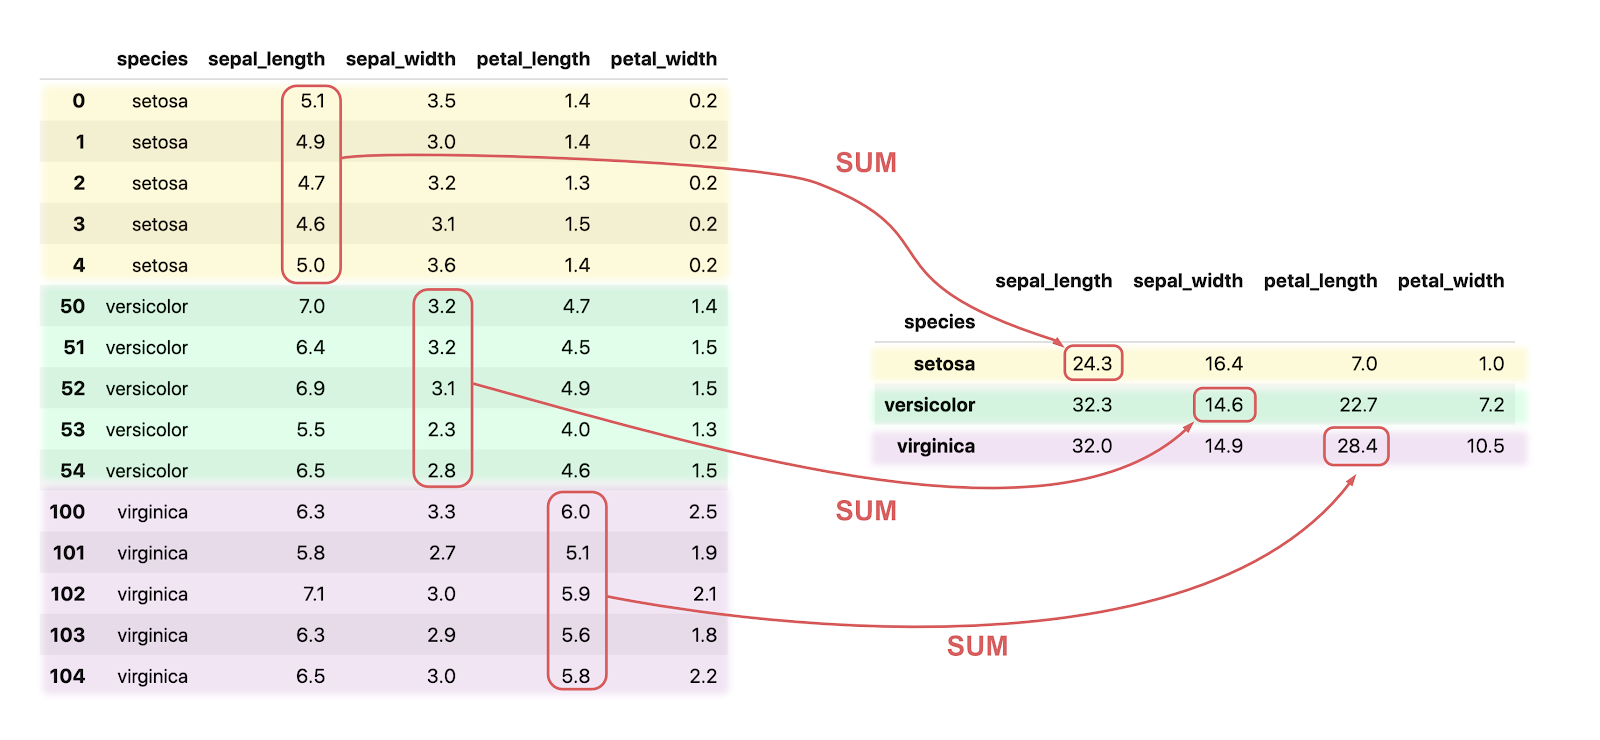
Quelle: https://towardsdatascience.com/how-to-use-the-split-apply-combine-strategy-in-pandas-groupby-29e0eb44b62e

Gruppieren ohne Aggregatsfunktion gibt ein [DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#) zurück und keine DataFrame. Erst nach Aufruf der gewünschten Aggregatsfunktion bekommt man wieder eine DataFrame.

In [ ]:
# Summe aller nummerischen Werte je Kategorie
df.groupby('Category').sum()

In [ ]:
# hier ohne Indexsetzen der Kategorien
df.groupby('Category', as_index=False).mean()

In [ ]:
# aggregation mit mehreren Aggregationsfunktionen
df.groupby('Category').agg({'Price': ['mean', 'std', 'median', 'count']})

In [ ]:
# in Liste pro Zelle aggregieren
df.groupby('Category').agg(list)

## DataFrames filtern nach Bedingungen

In [ ]:
# booleanische Serie
df['Price'] > 50

In [ ]:
# alle Zeilen mit Preis über 50
df[df['Price'] > 50]

## DataFrames zusammenfügen (Merge)
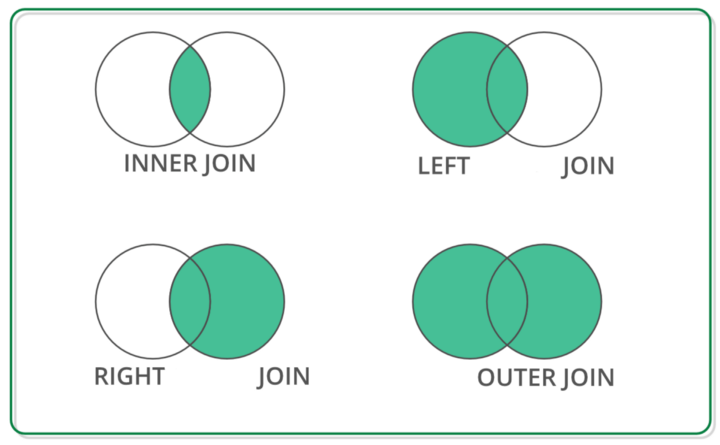
Quelle: https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d

In [ ]:
# Merge ist wie ein Join in SQL
# hier mergen wie diesselbe df an sich selbst, wo der Preis der linken Seite dem Preis nach Steuern auf der rechten Seite entspricht
pd.merge(df, df, left_on='Price', right_on='Price_After_Tax', how='left')

## Korrelation zwischen Spalten
Mit der Funktion [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) können Korrelationen zwischen Spalten einfach berechnet werden.

In [ ]:
df.corr()

## Plots
Es ist möglich in *Pandas* direkt zu plotten. Allerdings ist es empfehlenswert dies stattdessen mit [*Seaborn*](https://seaborn.pydata.org/) oder [*Matplotlib*](https://matplotlib.org/) zu machen.

In [ ]:
# es können alle Histogramme ausgegeben werden,
df.hist()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.Avilability
# scatterplot

sns.scatterplot(data=df, x='Avilability', y='Price', hue='Category')

# plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.legend(loc='upper right')

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=df, x='Price', bins='sturges', kde=True)
plt.show()

In [ ]:
# Vergrößern
plt.rcParams["figure.figsize"] = (20,20)

# Durchschnittspreis pro Kategorie
sns.barplot(data=df.groupby('Category', as_index=False).mean(), x='Price', y='Category')
plt.show()


In [ ]:
# verkleinern
plt.rcParams["figure.figsize"] = (5,5)

# Heatmap der Korrelation
sns.heatmap(df.corr())
plt.show()

## Pivot
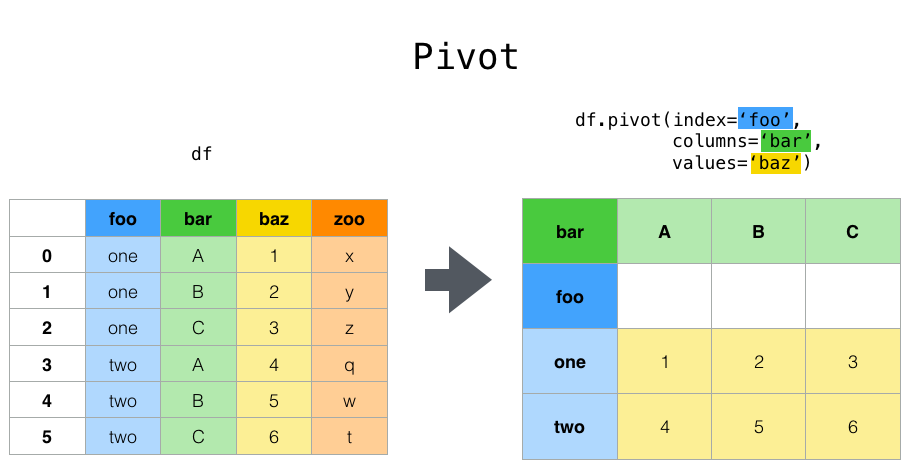
Quelle: https://pandas.pydata.org/docs/user_guide/reshaping.html

<div class="alert alert-info">
<b>Achtung</b> Beispiel nur zur Veranschaulichung! Es ergibt hier in dieser Form nicht so Sinn. 
</div>

In [ ]:
df.pivot_table(index=['Category'], columns=['Title'], values=['Price'])

## Was tun, wenn die gewünschte Funktion nicht in *Pandas* vorhanden?
Mit der Nutzung von [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) lassen sich Funktionen auf ganze Serien oder DataFrames anwenden. Es können auch eigene Funktionen mit `lambda` angewendet werden.

In [ ]:
# Anzahl der Zeichen im Titel
df['Title'].apply(len)

In [ ]:
def word_count(s):
    # gib Anzahl der Wörter im String zurück
    return len(s.split(' '))

# Anzahl der Wörter pro Titel-String an DataFrame anfügen
df['Title_nwords'] = df['Title'].apply(word_count)

In [ ]:
df[['Title', 'Title_nwords']].sample(10)

## tqdm 
*tqdm* lässt sich auch mit *Pandas* verwenden, [siehe hier](https://stackoverflow.com/questions/18603270/progress-indicator-during-pandas-operations). Damit lässt sich ein Progressbar anzeigen beim Aufruf von `apply()`.

In [ ]:
from tqdm import tqdm

# tqdm in Pandas nutzbar machen
tqdm.pandas()

# Anzahl der Wörter pro Titel-String an DataFrame anfügen
df['Book_Description_nwords'] = df['Book_Description'].progress_apply(word_count)

## Scrolling in Jupyter Notebook
Es kann mit folgendem Befehl festgelegt werden wie viele Zeilen man maximal zeigen möchte. Mit `None` wird immer die ganze DataFrame gezeigt, dies ist allerdings nicht zu empfehlen. 

In [ ]:
# Not recommended!
# pd.set_option("display.max_rows", None)


pd.set_option("display.max_rows", 300)